In [1]:
import json
from glob import glob
from os.path import join as pjoin
import os
import cv2
import numpy as np

from match_elements.GUI_pair import GUIPair
from GUI import GUI
from Operation import Operation

In [2]:
from keras.applications.resnet import ResNet50
resnet_model = ResNet50(include_top=False, input_shape=(32, 32, 3))

In [3]:
from paddleocr import PaddleOCR
paddle_ocr = PaddleOCR(use_angle_cls=True, lang='en')

[2022/03/04 16:23:35] root WARNING: lang en is not support in PP-OCRv2, auto switch to version PP-OCR
[2022/03/04 16:23:35] root WARNING: lang en is not support in PP-OCRv2, auto switch to version PP-OCR
[2022/03/04 16:23:35] root WARNING: version PP-OCRv2 not support cls models, auto switch to version PP-OCR
Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/ml/.paddleocr/2.3.0.2/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/ml/.paddleocr/2.3.0.2/ocr/det/en/en_ppocr_mobile_v2.0_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='box', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_s

In [4]:
gui = GUI('data/input/temp.jpg')
gui.detect_element(True, True, True, paddle_cor=paddle_ocr)
# gui.load_detection_result()
gui.show_detection_result()

[2022/03/04 16:23:38] root DEBUG: dt_boxes num : 17, elapse : 0.18749332427978516
[2022/03/04 16:23:38] root DEBUG: cls num  : 17, elapse : 0.06053042411804199
[2022/03/04 16:23:38] root DEBUG: rec_res num  : 17, elapse : 0.11926484107971191
[Text Detection Completed in 0.384 s] Input: data/input/temp.jpg Output: data/output/ocr/temp.json
[Compo Detection Completed in 0.392 s] Input: data/input/temp.jpg Output: data/output/ip/temp.json
[Merge Completed] Input: data/input/temp.jpg Output: data/output/merge/temp.jpg


In [14]:
# load operations
testing_data_root = '/home/ml/Data/visual testing/experiments/humanoid-output/adguard-1'

steps_file = pjoin(testing_data_root, 'output.json')
steps = json.load(open(steps_file, 'r'))

operations = []
for step in steps:
    op = Operation(pjoin(testing_data_root, step['tag'] + '.jpg'), step['event_type'], step['bounds'])
    op.shrink_target_element_img()
    op.resize(int(op.ui_img_width * (800 / op.ui_img_height)), 800)        
    op.detect_text(paddle_ocr)
    operations.append(op)
#     op.show_target_ele()
#     break

[2022/03/04 16:31:02] root DEBUG: dt_boxes num : 0, elapse : 0.002849102020263672
[2022/03/04 16:31:02] root DEBUG: cls num  : 0, elapse : 0
[2022/03/04 16:31:02] root DEBUG: rec_res num  : 0, elapse : 1.1920928955078125e-06
[Text Detection Completed in 0.004 s] Input: data/operation/target.png Output: data/operation/target.json
[2022/03/04 16:31:02] root DEBUG: dt_boxes num : 3, elapse : 0.009793519973754883
[2022/03/04 16:31:02] root DEBUG: cls num  : 3, elapse : 0.01139521598815918
[2022/03/04 16:31:02] root DEBUG: rec_res num  : 3, elapse : 0.031556129455566406
[Text Detection Completed in 0.056 s] Input: data/operation/target.png Output: data/operation/target.json
[2022/03/04 16:31:02] root DEBUG: dt_boxes num : 0, elapse : 0.004050016403198242
[2022/03/04 16:31:02] root DEBUG: cls num  : 0, elapse : 0
[2022/03/04 16:31:02] root DEBUG: rec_res num  : 0, elapse : 9.5367431640625e-07
[Text Detection Completed in 0.006 s] Input: data/operation/target.png Output: data/operation/target

[Text Detection Completed in 0.015 s] Input: data/operation/target.png Output: data/operation/target.json
[2022/03/04 16:31:03] root DEBUG: dt_boxes num : 0, elapse : 0.003971576690673828
[2022/03/04 16:31:03] root DEBUG: cls num  : 0, elapse : 0
[2022/03/04 16:31:03] root DEBUG: rec_res num  : 0, elapse : 1.9073486328125e-06
[Text Detection Completed in 0.006 s] Input: data/operation/target.png Output: data/operation/target.json
[2022/03/04 16:31:03] root DEBUG: dt_boxes num : 3, elapse : 0.010228395462036133
[2022/03/04 16:31:03] root DEBUG: cls num  : 3, elapse : 0.011666297912597656
[2022/03/04 16:31:03] root DEBUG: rec_res num  : 3, elapse : 0.03320574760437012
[Text Detection Completed in 0.059 s] Input: data/operation/target.png Output: data/operation/target.json
[2022/03/04 16:31:03] root DEBUG: dt_boxes num : 0, elapse : 0.0031909942626953125
[2022/03/04 16:31:03] root DEBUG: cls num  : 0, elapse : 0
[2022/03/04 16:31:03] root DEBUG: rec_res num  : 0, elapse : 9.5367431640625e

In [15]:
opr = operations[1]
opr.show_target_ele()
# gui.adjust_elements_by_screen()
# matched_e = gui.match_elements(target_ele_img=opr.target_element_img, target_ele_text=opr.get_text_content(), resnet_model=resnet_model, show=True)

array([[[ 29,  60,  21],
        [ 29,  60,  21],
        [ 29,  60,  21],
        ...,
        [ 29,  60,  21],
        [ 29,  60,  21],
        [ 29,  60,  21]],

       [[ 29,  60,  21],
        [ 29,  60,  21],
        [ 29,  60,  21],
        ...,
        [ 29,  60,  21],
        [ 29,  60,  21],
        [ 29,  60,  21]],

       [[ 29,  60,  21],
        [ 29,  60,  21],
        [ 29,  60,  21],
        ...,
        [ 29,  60,  21],
        [ 29,  60,  21],
        [ 29,  60,  21]],

       ...,

       [[235, 235, 235],
        [235, 235, 235],
        [235, 235, 235],
        ...,
        [235, 235, 235],
        [235, 235, 235],
        [235, 235, 235]],

       [[235, 235, 235],
        [235, 235, 235],
        [235, 235, 235],
        ...,
        [235, 235, 235],
        [235, 235, 235],
        [235, 235, 235]],

       [[235, 235, 235],
        [235, 235, 235],
        [235, 235, 235],
        ...,
        [235, 235, 235],
        [235, 235, 235],
        [235, 235, 235]]

In [9]:
cv2.imshow('ele', opr.target_element_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [11]:
cv2.imwrite('data/output/target_ele.png', opr.target_element_img)

True

In [16]:
gui.recognize_phone_screen()

(0, 0)


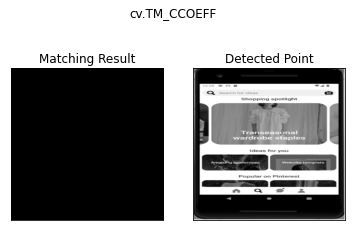

(0, 0)


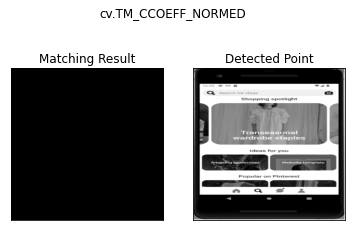

(0, 0)


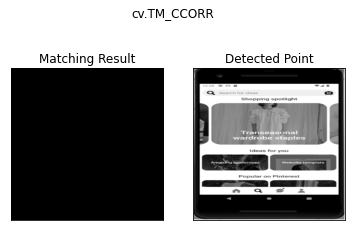

(0, 0)


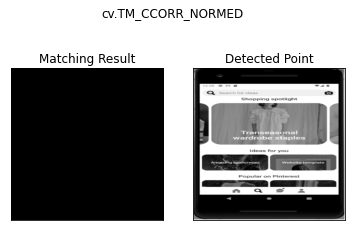

(0, 0)


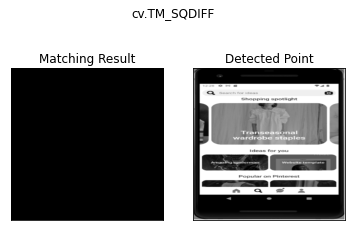

(0, 0)


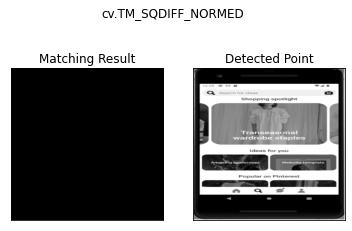

In [20]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('/home/ml/Code/github/Robot-Visual-Testing/data/input/3.png',0)
img = cv.resize(img, (500, 500))
img2 = img.copy()
template = cv.imread('/home/ml/Code/github/Robot-Visual-Testing/data/input/4.png',0)
template = cv.resize(template, (500, 500))
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    print(max_loc)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()